# Assignment 2:

In [406]:
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Question 2.1

A process $X_t$ is given as:
$$
X_t = \varepsilon_t + \varepsilon_{t-1} + \varepsilon_{t-2} + \varepsilon_{t-3}
$$

This is a MA(3) process.

Text(0.5, 0, 't')

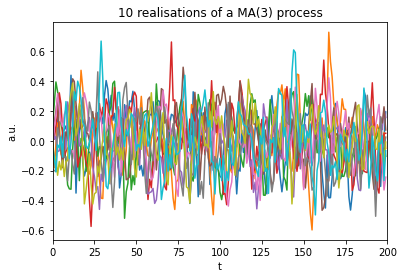

In [307]:
# Parameters:
order = 3
numRealisations = 10
numObservations = 200

# Make process:
MAProcess = ArmaProcess([1], np.ones(order))
realisations = []
for r in range(numRealisations):
    simulation = MAProcess.generate_sample(nsample= 200, scale= 0.1)
    realisations.append(simulation)
    plt.plot(simulation)

plt.xlim(0, 200)
plt.title(f"{numRealisations} realisations of a MA({order}) process")
plt.ylabel("a.u.")
plt.xlabel("t")


### Second order moment representation:

In [308]:
EX = np.mean(realisations[0])
print(EX)

VarX = np.nanvar(realisations[0])
print(VarX)

CorrX = np.corrcoef(realisations[0], realisations[0])
print(CorrX)

-0.0032065241102257236
0.03648302095406731
[[1. 1.]
 [1. 1.]]


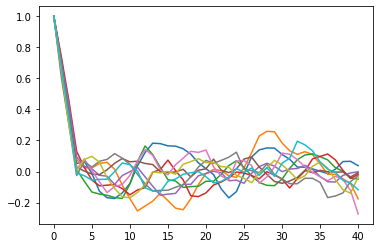

In [309]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

fig = plt.figure()
for r in realisations:
    autoCorr, qStat,_ = acf(r, qstat= True)
    plt.plot(autoCorr)


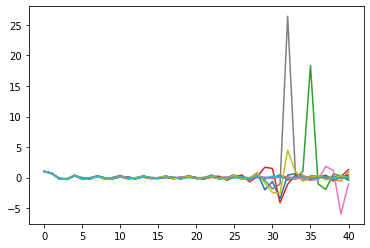

In [310]:
warnings.simplefilter(action='ignore', category=RuntimeWarning)

fig = plt.figure()
for r in realisations:
    partialAutoCorr = pacf(r)
    plt.plot(partialAutoCorr)

In [311]:
for r in range(len(realisations)):
    print(f"The variance for realisation {r + 1} is {round(np.nanvar(realisations[r]), 4)}")

The variance for realisation 1 is 0.0365
The variance for realisation 2 is 0.0383
The variance for realisation 3 is 0.0329
The variance for realisation 4 is 0.0381
The variance for realisation 5 is 0.0272
The variance for realisation 6 is 0.0304
The variance for realisation 7 is 0.0263
The variance for realisation 8 is 0.0301
The variance for realisation 9 is 0.0275
The variance for realisation 10 is 0.038


## Question 2.2:

Model for house temperature:

$$
(1-0.5B + 0.3B^2)(1-0.9B^{12})(Y_t - \mu) = \varepsilon_t
$$

Where $\varepsilon_t$ are a white noise porces with variance $\sigma^2_{\varepsilon} = 0.5^2$ and $\mu = 55$.

In [294]:
# Put the data into a data frame:
temp = np.array([46.6, 49.5, 60.3, 59.2, 59.5, 61.9, 59.7, 60.1, 57.8, 49.7, 49.7, 50.1, 48.6, 54.5, 62.3])
year = np.array([2016, 2016, 2016, 2016, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017])
month = np.array([9, 10, 11, 12, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

data = pd.DataFrame()
data["Year"] = year
data["Month"] = month
data["Temp"] = temp

print(data)


    Year  Month  Temp
0   2016      9  46.6
1   2016     10  49.5
2   2016     11  60.3
3   2016     12  59.2
4   2017      1  59.5
5   2017      2  61.9
6   2017      3  59.7
7   2017      4  60.1
8   2017      5  57.8
9   2017      6  49.7
10  2017      7  49.7
11  2017      8  50.1
12  2017      9  48.6
13  2017     10  54.5
14  2017     11  62.3


A upper and lower confidence interval is given as: 

[61.41089516 58.33051696] 

[63.37510099 61.86448111] 



Text(0, 0.5, 'Temperature [°F]')

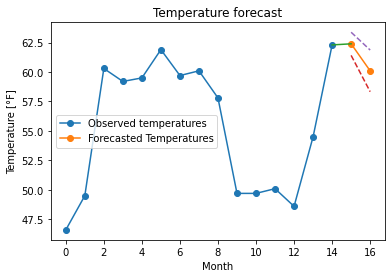

In [502]:
# Parameters:
mu = 55
sigma = 0.5
p = 2  # Due to two B's
d = 0
q = 1 # One error term

# Seasonal parameters:
P = 1 # Due to one B at 12
D = 0
Q = 0
s = 12

# Make model:
#trend = np.poly1d([1, -0.5, -0.3, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.9])
model = ARIMA(np.array(data["Temp"]), order= (p, d, q), seasonal_order=(P, D, Q, s))

# Fit model using the provided parameters:
with model.fix_params({"const": mu, "sigma2": sigma**2,"ar.L1": 0.5, "ar.L2": -0.3, "ar.S.L12": 0.9, "ma.L1": 1}):
    res = model.fit()

# Forecast:
forecast = res.get_forecast(2)
yhat = forecast.predicted_mean
confInt = np.transpose(forecast.conf_int())
print("A upper and lower confidence interval is given as: \n")
print(confInt[0], "\n")
print(confInt[1], "\n")


# Time vectors for plotting:
timeVectorData = [t for t in range(len(data))]
timeVectorForecast = [t for t in range(len(data), len(data) + len(yhat))]

# Plot
plt.plot(timeVectorData, data["Temp"], "-o")
plt.plot(timeVectorForecast, yhat, "-o")
plt.plot([14,15], [data["Temp"][len(data)-1], yhat[0]]) # Connecting the two graphs for visuals.
plt.plot(timeVectorForecast, confInt[0], "--")
plt.plot(timeVectorForecast, confInt[1], "--")
plt.title("Temperature forecast")
plt.legend(["Observed temperatures", "Forecasted Temperatures"])
plt.xlabel("Month")
plt.ylabel("Temperature [°F]")


## Question 2.3: See other file

### 1.) A(1, 0, 0)x(0, 0, 0)$_{12}$ model with $\phi_1 = -0.85$

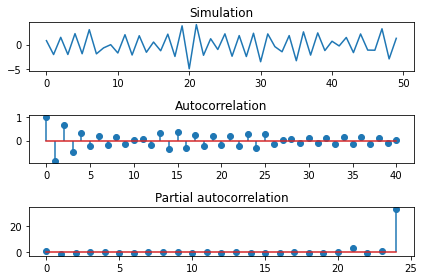

In [555]:
# Parameters:
nSamples = 50

phi1 = 0.85

arima_process = ArmaProcess(ar= [1, phi1])
simulation = arima_process.generate_sample(nsample= nSamples)

# Plotting:
plt.figure

plt.subplot(311)
plt.plot(simulation)
plt.title("Simulation")

plt.subplot(312)
plt.stem(acf(simulation))
plt.title("Autocorrelation")

plt.subplot(313)
plt.stem(pacf(simulation, nlags= 24))
plt.title("Partial autocorrelation")

plt.tight_layout()

### 2.) A(0, 0, 0)x(1, 0, 0)$_{12}$ model with $\Phi_1 = -0.85$

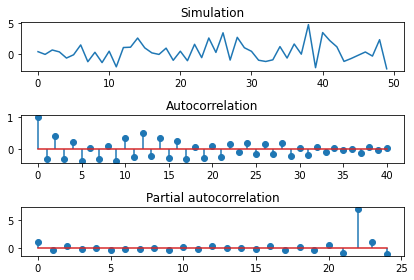

In [556]:
# Parameters:
nSamples = 50

Phi1 = -0.85

arima_process = ArmaProcess(ar= [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, Phi1])
simulation = arima_process.generate_sample(nsample= nSamples)

# Plotting:
plt.figure

plt.subplot(311)
plt.plot(simulation)
plt.title("Simulation")

plt.subplot(312)
plt.stem(acf(simulation))
plt.title("Autocorrelation")

plt.subplot(313)
plt.stem(pacf(simulation, nlags= 24))
plt.title("Partial autocorrelation")

plt.tight_layout()

### 3.) A(1, 0, 0) x (0, 0, 1)$_{12}$ model with $\phi_1 = -0.8$ and $\Theta_1 = 0.9$.

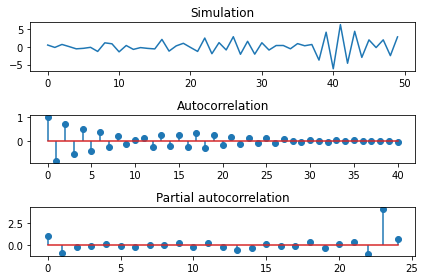

In [564]:
# Parameters:
nSamples = 50

phi1 = 0.8
Theta1 = -0.9


arima_process = ArmaProcess(ar= [1, phi1], ma= [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, Theta1])
simulation = arima_process.generate_sample(nsample= nSamples)

# Plotting:
plt.figure

plt.subplot(311)
plt.plot(simulation)
plt.title("Simulation")

plt.subplot(312)
plt.stem(acf(simulation))
plt.title("Autocorrelation")

plt.subplot(313)
plt.stem(pacf(simulation, nlags= 24))
plt.title("Partial autocorrelation")

plt.tight_layout()

### 4.) A(1, 0, 0)x(1, 0, 0)$_{12}$ with $\phi_1 = 0.7$ and $ \Phi_1 = 0.8$

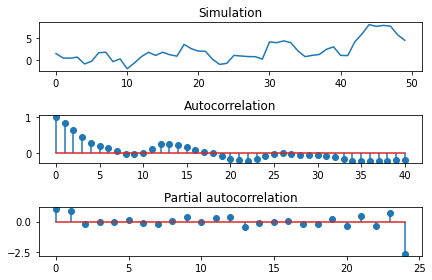

In [560]:
# Parameters:
nSamples = 50

phi1 = -0.7
Phi1 = -0.8


arima_process = ArmaProcess(ar= [1, phi1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, Phi1])
simulation = arima_process.generate_sample(nsample= nSamples)

# Plotting:
plt.figure

plt.subplot(311)
plt.plot(simulation)
plt.title("Simulation")

plt.subplot(312)
plt.stem(acf(simulation))
plt.title("Autocorrelation")

plt.subplot(313)
plt.stem(pacf(simulation, nlags= 24))
plt.title("Partial autocorrelation")

plt.tight_layout()

### 5.) A(2, 0, 0)x(1, 0, 0)$_{12}$ with $\phi_1 = 0.5$, $\phi_2 = -0.3$ and $ \Phi_1 = 0.8$

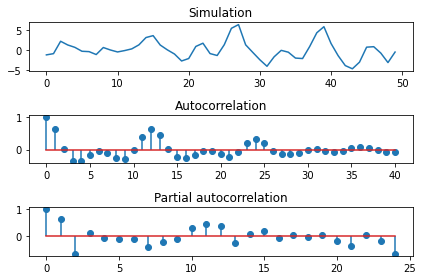

In [561]:
# Parameters:
nSamples = 50

phi1 = -0.5
phi2 = 0.3
Phi1 = -0.8


arima_process = ArmaProcess(ar= [1, phi1, phi2, 0, 0, 0, 0, 0, 0, 0, 0, 0, Phi1])
simulation = arima_process.generate_sample(nsample= nSamples)

# Plotting:
plt.figure

plt.subplot(311)
plt.plot(simulation)
plt.title("Simulation")

plt.subplot(312)
plt.stem(acf(simulation))
plt.title("Autocorrelation")

plt.subplot(313)
plt.stem(pacf(simulation, nlags= 24))
plt.title("Partial autocorrelation")

plt.tight_layout()

### 6.) A(0, 0, 1)x(0, 0, 1)$_{12}$ with $\theta_1 = -0.4$ and $\Theta_1 = 0.8$

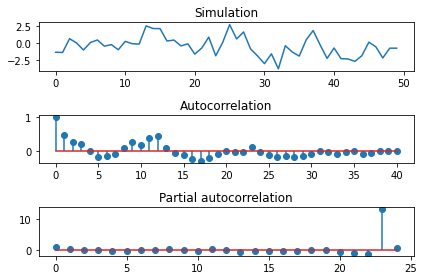

In [565]:
# Parameters:
nSamples = 50

theta1 = 0.4
Theta1 = 0.8


arima_process = ArmaProcess(ar= [1], ma= [1, theta1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, Theta1])
simulation = arima_process.generate_sample(nsample= nSamples)

# Plotting:
plt.figure

plt.subplot(311)
plt.plot(simulation)
plt.title("Simulation")

plt.subplot(312)
plt.stem(acf(simulation))
plt.title("Autocorrelation")

plt.subplot(313)
plt.stem(pacf(simulation, nlags= 24))
plt.title("Partial autocorrelation")

plt.tight_layout()